Гончаренко Дарья

Пакет данных: Music & Mental Health Survey Results

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df = pd.read_csv('mxmh_survey_results.csv')
print(df.head())
sns.set_theme()

            Timestamp   Age Primary streaming service  Hours per day  \
0  8/27/2022 19:29:02  18.0                   Spotify            3.0   
1  8/27/2022 19:57:31  63.0                   Pandora            1.5   
2  8/27/2022 21:28:18  18.0                   Spotify            4.0   
3  8/27/2022 21:40:40  61.0             YouTube Music            2.5   
4  8/27/2022 21:54:47  18.0                   Spotify            4.0   

  While working Instrumentalist Composer         Fav genre Exploratory  \
0           Yes             Yes      Yes             Latin         Yes   
1           Yes              No       No              Rock         Yes   
2            No              No       No  Video game music          No   
3           Yes              No      Yes              Jazz         Yes   
4           Yes              No       No               R&B         Yes   

  Foreign languages  ...  Frequency [R&B]  Frequency [Rap] Frequency [Rock]  \
0               Yes  ...        Sometimes  

Удаление строк с неполным набором данных. Новое количество строк.

In [5]:

df.dropna(inplace=True, how='any')
print(len(df))

616


Кто участвует:

Text(0, 0.5, 'Кол-во человек')

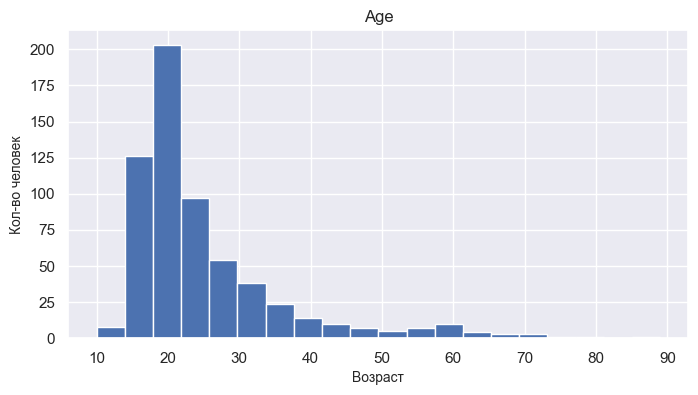

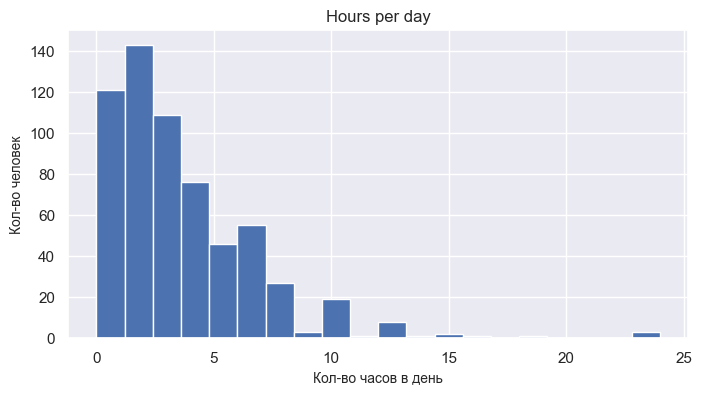

In [58]:
df[['Age']].hist(bins=20,figsize=(8, 4))
plt.xlabel('Возраст', fontsize=10)
plt.ylabel('Кол-во человек', fontsize=10)  

df[['Hours per day']].hist(bins=20,figsize=(8, 4))
plt.xlabel('Кол-во часов в день', fontsize=10)
plt.ylabel('Кол-во человек', fontsize=10) 

Text(0, 0.5, 'Любимый жанр')

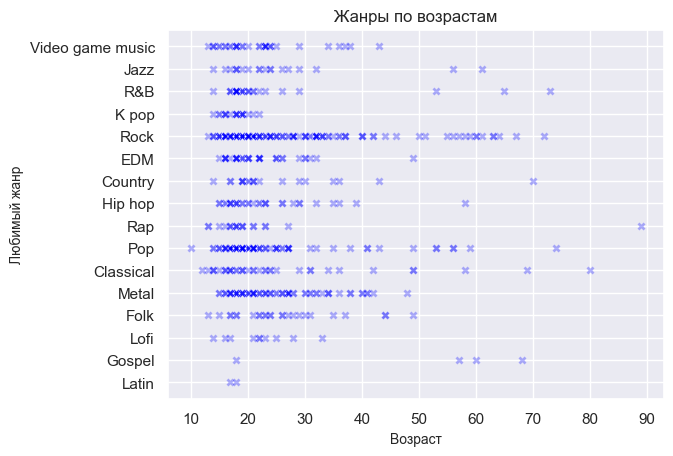

In [60]:
sns.scatterplot(data=df, y="Fav genre", x="Age", alpha = 0.3, marker = "X", color = "blue")
plt.title('Жанры по возрастам');
plt.xlabel('Возраст', fontsize=10)
plt.ylabel('Любимый жанр', fontsize=10) 

Гипотеза: Люди слушающие рок имеют худшее психическое самочувствие, а церковной музыки - лучшее.

Text(0, 0.5, 'Кол-во человек')

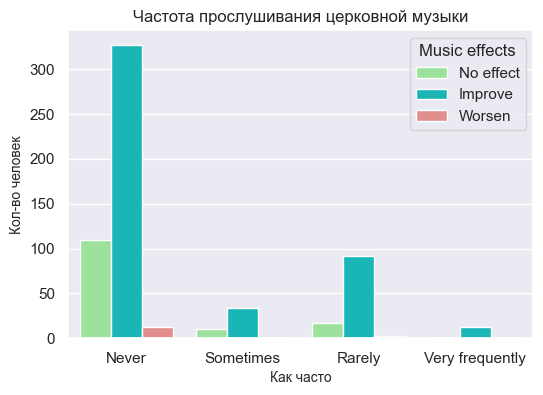

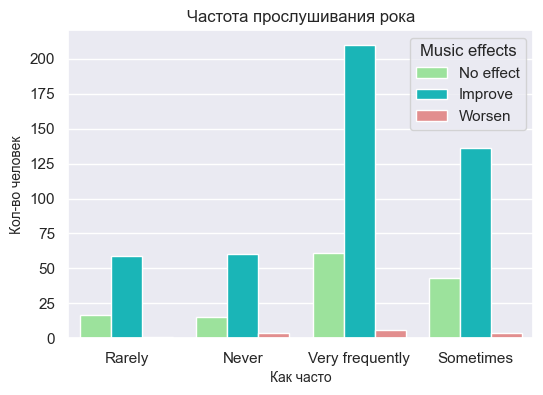

In [76]:

plt.figure(figsize=(6,4))
sns.countplot(x=df['Frequency [Gospel]'],palette = s_colors2, hue=df['Music effects'])
plt.xlabel('Gospel Music')
plt.title('Частота прослушивания церковной музыки');
plt.xlabel('Как часто', fontsize=10)
plt.ylabel('Кол-во человек', fontsize=10) 

plt.figure(figsize=(6,4))
sns.countplot(x=df['Frequency [Rock]'],palette = s_colors2, hue=df['Music effects'])
plt.xlabel('Rock')
plt.title('Частота прослушивания рока');
plt.xlabel('Как часто', fontsize=10)
plt.ylabel('Кол-во человек', fontsize=10) 

Люди часто слушающие рок сообщают о большем улучшении качества жизни чем соответствующая группа слушателей церковной музыки.

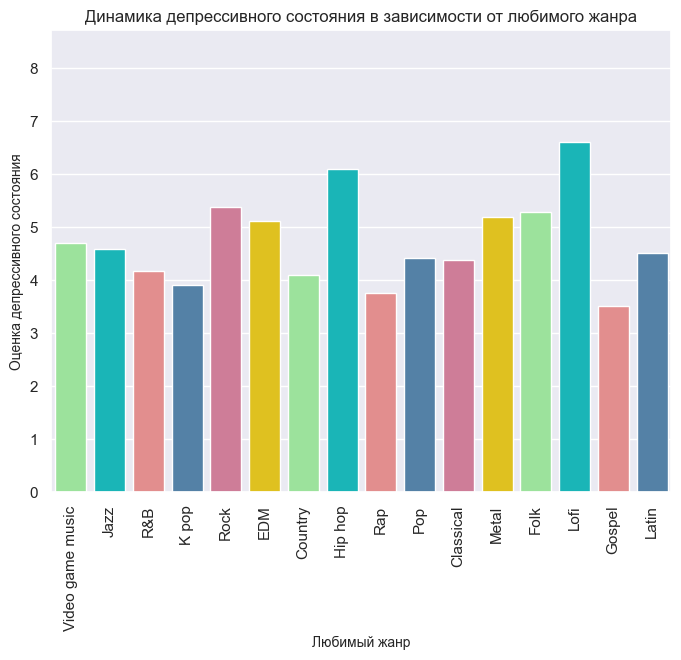

In [71]:
plt.figure(figsize=(8,6))
rslt_df1 = df[(df['Fav genre'] == 'Gospel') & ((df['Fav genre'] == 'Rock'))]
sns.barplot(x=df['Fav genre'], y=df['Depression'], errwidth=0, palette=s_colors2)
plt.xticks(rotation=90)
plt.xlabel('Любимый жанр', fontsize=10)
plt.ylabel('Оценка депрессивного состояния', fontsize=10)
plt.title('Динамика депрессивного состояния в зависимости от любимого жанра'); 

У рока средний показатель количества респондентов, оценивших свое состояние как депрессивное. У слушателей церковной музыки наименьший показатель.

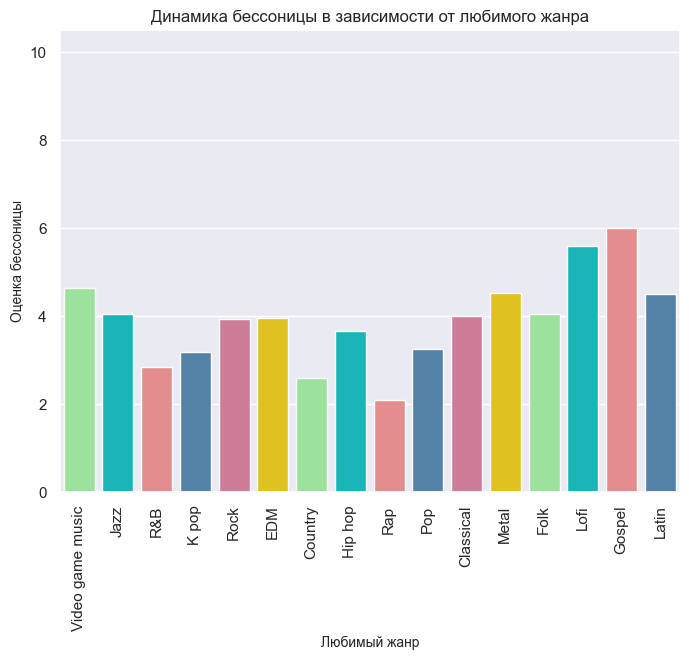

In [70]:
plt.figure(figsize=(8,6))
rslt_df1 = df[(df['Fav genre'] == 'Gospel') & ((df['Fav genre'] == 'Rock'))]
sns.barplot(x=df['Fav genre'], y=df['Insomnia'], errwidth=0, palette=s_colors2)
plt.xticks(rotation=90)
plt.xlabel('Любимый жанр', fontsize=10)
plt.ylabel('Оценка бессоницы', fontsize=10)
plt.title('Динамика бессоницы в зависимости от любимого жанра'); 

Слушатели церковной музыки показывают наибольшее значение страдающих бессоницей.

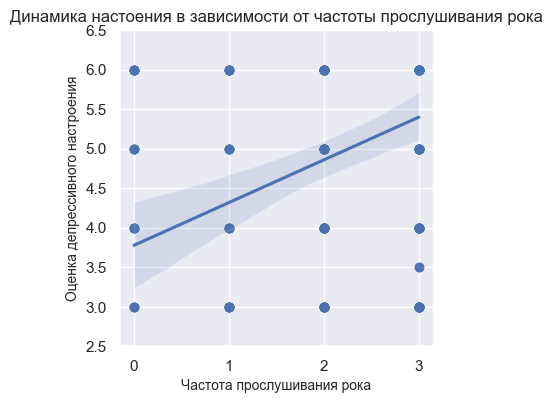

In [98]:
df1=df
df1.replace(['Never', 'Rarely', 'Sometimes', 'Frequently', 'Very frequently'],
                       [0, 1, 2, 3, 4], inplace=True)
fig = sns.lmplot(x ='Frequency [Rock]', y ='Depression', data = df1, height=4)
fig.set(ylim=(2.5, 6.5)) 
plt.xlabel('Частота прослушивания рока', fontsize=10)
plt.ylabel('Оценка депрессивного настроения', fontsize=10)
plt.title('Динамика настоения в зависимости от частоты прослушивания рока'); 

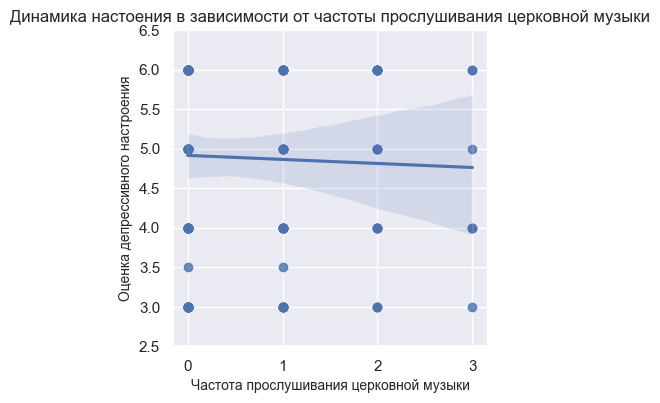

In [100]:
df1=df
df1.replace(['Never', 'Rarely', 'Sometimes', 'Frequently', 'Very frequently'],
                       [0, 1, 2, 3, 4], inplace=True)
fig = sns.lmplot(x ='Frequency [Gospel]', y ='Depression', data = df1, height=4)
fig.set(ylim=(2.5, 6.5)) 
plt.xlabel('Частота прослушивания церковной музыки', fontsize=10)
plt.ylabel('Оценка депрессивного настроения', fontsize=10)
plt.title('Динамика настоения в зависимости от частоты прослушивания церковной музыки'); 

Вывод: Частое прослушивание рока ведет к ухудшению ментального состояния, но при этом среди слушателей рока в целом показатели депрессии и бессоницы не выше чем у других жанров. 
Люди, прослушивающие церковную музыку имеют наименьшие показатели депрессии. При этом чем чаще слушают, тем лучше себя чувствуют (хотя коэффицент и маленький).  Но слушатели церковной музыки имеют наибольшие показатели бессоницы. 
Гипотеза не верна.
Слушатели рока имеют среднее самочувствие, а люди слушающие церковную музыку больше всех страдают бессоницей.

In [103]:


print("Корреляция между количеством прослушивания церковной музыки и депрессией: ")
print(df1['Frequency [Gospel]'].corr(df1['Depression']))

print("Корреляция между количеством прослушивания рока и депрессией: ")
print(df1['Frequency [Rock]'].corr(df1['Depression']))
 


Корреляция между количеством прослушивания церковной музыки и депрессией: 
-0.012000981252858499
Корреляция между количеством прослушивания рока и депрессией: 
0.18769205615704654
